> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/meetings_workshops/swot_ea_workshop_sept2022/SWOTHR_s3Access.ipynb).

# SWOT Simulated North American Continent Hydrology Dataset Exploration in the Cloud

## Accessing and Visualizing SWOT Simulated Datasets

### Requirement:
This tutorial can only be run in an **AWS cloud instance running in us-west-2**: NASA Earthdata Cloud data in S3 can be directly accessed via `earthaccess` python library; this access is limited to requests made within the US West (Oregon) (code: `us-west-2`) AWS region.

### Learning Objectives:
- Access all 6 products of SWOT HR sample data (archived in NASA Earthdata Cloud) within the AWS cloud, without downloading to local machine
- Visualize accessed data

### SWOT Simulated Level 2 North America Continent KaRIn High Rate Version 1 Datasets:

1. **River Vector Shapefile** - SWOT_SIMULATED_NA_CONTINENT_L2_HR_RIVERSP_V1

>DOI: [https://doi.org/10.5067/KARIN-2RSP1](https://doi.org/10.5067/KARIN-2RSP1)

2. **Lake Vector Shapefile** - SWOT_SIMULATED_NA_CONTINENT_L2_HR_LAKESP_V1
    
>DOI: [https://doi.org/10.5067/KARIN-2LSP1](https://doi.org/10.5067/KARIN-2LSP1) 

3. **Water Mask Pixel Cloud NetCDF** - SWOT_SIMULATED_NA_CONTINENT_L2_HR_PIXC_V1

>DOI: [https://doi.org/10.5067/KARIN-2PIX1](https://doi.org/10.5067/KARIN-2PIX1) 
    
4. **Water Mask Pixel Cloud Vector Attribute NetCDF** - SWOT_SIMULATED_NA_CONTINENT_L2_HR_PIXCVEC_V1
    
>DOI: [https://doi.org/10.5067/KARIN-2PXV1](https://doi.org/10.5067/KARIN-2PXV1) 

5. **Raster NetCDF** - SWOT_SIMULATED_NA_CONTINENT_L2_HR_RASTER_V1

>DOI: [https://doi.org/10.5067/KARIN-2RAS1](https://doi.org/10.5067/KARIN-2RAS1) 

6. **KaRIn Sea Surface Height from GLORYSs** - SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_CALVAL_V1

>DOI: [https://doi.org/10.5067/KARIN-2GLC1](https://doi.org/10.5067/KARIN-2GLC1)

_Notebook Authors: Cassie Nickles and Zoë Walschots, NASA PO.DAAC (July 2023)_
  

### Libraries Needed

In [1]:
import glob
import os
import requests
import s3fs
import netCDF4 as nc
from netCDF4 import Dataset
import h5netcdf
import xarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import shapefile as shp
import zipfile
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store

### Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up. We use earthaccess to authenticate your login credentials below.

In [2]:
auth = earthaccess.login(strategy="interactive", persist=True)

Enter your Earthdata Login username:  zoewalschots
Enter your Earthdata password:  ········


You're now authenticated with NASA Earthdata Login
Using token with expiration date: 08/12/2023
Using user provided credentials for EDL
Persisting credentials to .netrc


#### Set up an `s3fs` session for Direct Access
`s3fs` sessions are used for authenticated access to s3 bucket and allows for typical file-system style operations. Below we create session by passing in the data access information.

In [ ]:
fs_s3 = earthaccess.get_s3fs_session(daac='PODAAC', provider='POCLOUD')

## Single File Access

The s3 access link can be found using `earthaccess` data search. Since this collection consists of Reach and Node files, we need to extract only the granule for the Reach file. We do this by filtering for the 'Reach' title in the data link.

Alternatively, Earthdata Search [(see tutorial)](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/tutorials/01_Earthdata_Search.html) can be used to manually search for a single file.

**1. River Vector Shapefiles**

In [ ]:
#retrieves granule from the day we want
river_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_NA_CONTINENT_L2_HR_RIVERSP_V1', temporal = ('2022-08-22 19:24:41', '2022-08-22 19:30:37'))

In [ ]:
#finds the s3 link of the one granule we want (The collection contains both Reaches and Nodes, but here we want only the Reach)
river_data = []
for g in river_results:
    for l in earthaccess.results.DataGranule.data_links(g, access='direct'):
        if "Reach" in l:
            river_data.append(l)
print(river_data)

In [ ]:
#creates s3 file object for the one link we want
s3_file_obj1 = fs_s3.open(river_data[0], mode='rb')

The native format for this sample data is a .zip file, and we want the .shp file within the .zip file, so we need to download the contents of the zip file into the cloud environment. I created a folder called `SWOT_HR_shp` to write to. Change the path to where you would like your extracted files to be written.


In [ ]:
with zipfile.ZipFile(s3_file_obj1, 'r') as zip_ref:
    zip_ref.extractall('SWOT_HR_shp')

Next, we'll look at the attribute table of the .shp file we just extracted to the 'SWOT_HR_shp' folder.

In [ ]:
SWOT_HR_shp1 = gpd.read_file('SWOT_HR_shp/SWOT_L2_HR_RiverSP_Reach_007_522_NA_20220822T192441_20220822T193037_PGA0_01.shp') 
SWOT_HR_shp1

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
SWOT_HR_shp1.plot(ax=ax, color='black')

**2. Lake Vector Shapefiles**

The lake vector shapefiles can be accessed in the same way as the river shapefiles above.

In [ ]:
lake_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_NA_CONTINENT_L2_HR_LAKESP_V1', temporal = ('2022-08-22 19:24:18', '2022-08-22 19:30:50'))

In [ ]:
#find the s3 link of the desired granule (This collection has three options: Obs, Unassigned, and Prior - we want Obs)
lake_data = []
for g in lake_results:
    for l in earthaccess.results.DataGranule.data_links(g, access='direct'):
        if "Obs" in l:
            lake_data.append(l)
print(lake_data)

In [ ]:
s3_file_obj2 = fs_s3.open(lake_data[0], mode='rb')

In [ ]:
with zipfile.ZipFile(s3_file_obj2, 'r') as zip_ref:
    zip_ref.extractall('SWOT_HR_shp')

In [ ]:
SWOT_HR_shp2 = gpd.read_file('SWOT_HR_shp/SWOT_L2_HR_LakeSP_Obs_007_522_NA_20220822T192415_20220822T193051_Dx0000_01.shp') 
SWOT_HR_shp2

In [ ]:
fig, ax = plt.subplots(figsize=(7,12))
SWOT_HR_shp2.plot(ax=ax, color='black')

**3. Water Mask Pixel Cloud NetCDF**

Accessing the remaining files is different than the shp files above. We do not need to unzip the files because they are stored in native netCDF files in the cloud. For the rest of the products, we will open via `xarray`.

In [ ]:
watermask_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_NA_CONTINENT_L2_HR_PIXC_V1', temporal = ('2022-08-22 19:29:00', '2022-08-22 19:29:11'), point = ('-90', '35'))

The pixel cloud netCDF files are formatted with three groups titled, "pixel cloud", "tvp", or "noise" (more detail [here](https://podaac-tools.jpl.nasa.gov/drive/files/misc/web/misc/swot_mission_docs/pdd/D-56411_SWOT_Product_Description_L2_HR_PIXC_20200810.pdf)). In order to access the coordinates and variables within the file, a group must be specified when calling xarray open_dataset.

In [ ]:
ds_PIXC = xr.open_mfdataset(earthaccess.open([watermask_results[0]]), group = 'pixel_cloud', engine='h5netcdf')
ds_PIXC

In [ ]:
plt.scatter(x=ds_PIXC.longitude, y=ds_PIXC.latitude, c=ds_PIXC.height)
plt.colorbar().set_label('Height (m)')

**4. Water Mask Pixel Cloud Vector Attribute NetCDF**

In [ ]:
vector_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_NA_CONTINENT_L2_HR_PIXCVEC_V1', temporal = ('2022-08-22 19:29:00', '2022-08-22 19:29:11'), point = ('-90', '35'))

In [ ]:
ds_PIXCVEC = xr.open_mfdataset(earthaccess.open([vector_results[0]]), decode_cf=False,  engine='h5netcdf')
ds_PIXCVEC

In [ ]:
pixcvec_htvals = ds_PIXCVEC.height_vectorproc.compute()
pixcvec_latvals = ds_PIXCVEC.latitude_vectorproc.compute()
pixcvec_lonvals = ds_PIXCVEC.longitude_vectorproc.compute()

#Before plotting, we set all fill values to nan so that the graph shows up better spatially
pixcvec_htvals[pixcvec_htvals > 15000] = np.nan
pixcvec_latvals[pixcvec_latvals > 80] = np.nan
pixcvec_lonvals[pixcvec_lonvals > 180] = np.nan

In [ ]:
plt.scatter(x=pixcvec_lonvals, y=pixcvec_latvals, c=pixcvec_htvals)
plt.colorbar().set_label('Height (m)')

**5. Raster NetCDF**

In [ ]:
raster_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_NA_CONTINENT_L2_HR_RASTER_V1', temporal = ('2022-08-22 19:28:50', '2022-08-22 19:29:11'), point = ('-90', '35'))

In [ ]:
#this collection has 100m and 250m granules, but we only want 100m
raster_data = []
for g in raster_results:
    for l in earthaccess.results.DataGranule.data_links(g, access='direct'):
        if "100m" in l:
            raster_data.append(l)
print(raster_data)

In [ ]:
ds_raster = xr.open_mfdataset(earthaccess.open([raster_data[0]], provider = 'POCLOUD'), engine='h5netcdf')
ds_raster

It's easy to analyze and plot the data with packages such as `hvplot`!

In [ ]:
ds_raster.wse.hvplot.image(y='y', x='x')

# Multi-File

In [4]:
glorys_results = earthaccess.search_data(short_name = 'SWOT_SIMULATED_L2_KARIN_SSH_GLORYS_CALVAL_V1', temporal = ('2015-05-01 00:00:00', '2015-05-01 23:59:59'))

Granules found: 29


In [6]:
ds = xr.open_mfdataset(earthaccess.open(glorys_results), combine='nested', concat_dim="num_lines", decode_times=False, engine='h5netcdf')
ds

 Opening 29 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/29 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/29 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/29 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:                                (num_lines: 286144, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/91)
    time                                   (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    time_tai                               (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ssh_karin_2                            (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    ...                                     ...
    simulated_error_karin                  (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_timing                 (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_baseline_dilation      (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_roll                   (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_phase                  (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    simulated_error_orbital                (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-10 10:37:14Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       157.4108182844071
    right_last_latitude:        77.03307806541929
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.003352810664781205

Some of the granules are of different size dimensions, so we first use earthaccess to open them, and then loop through each granule to load it into the dataset.

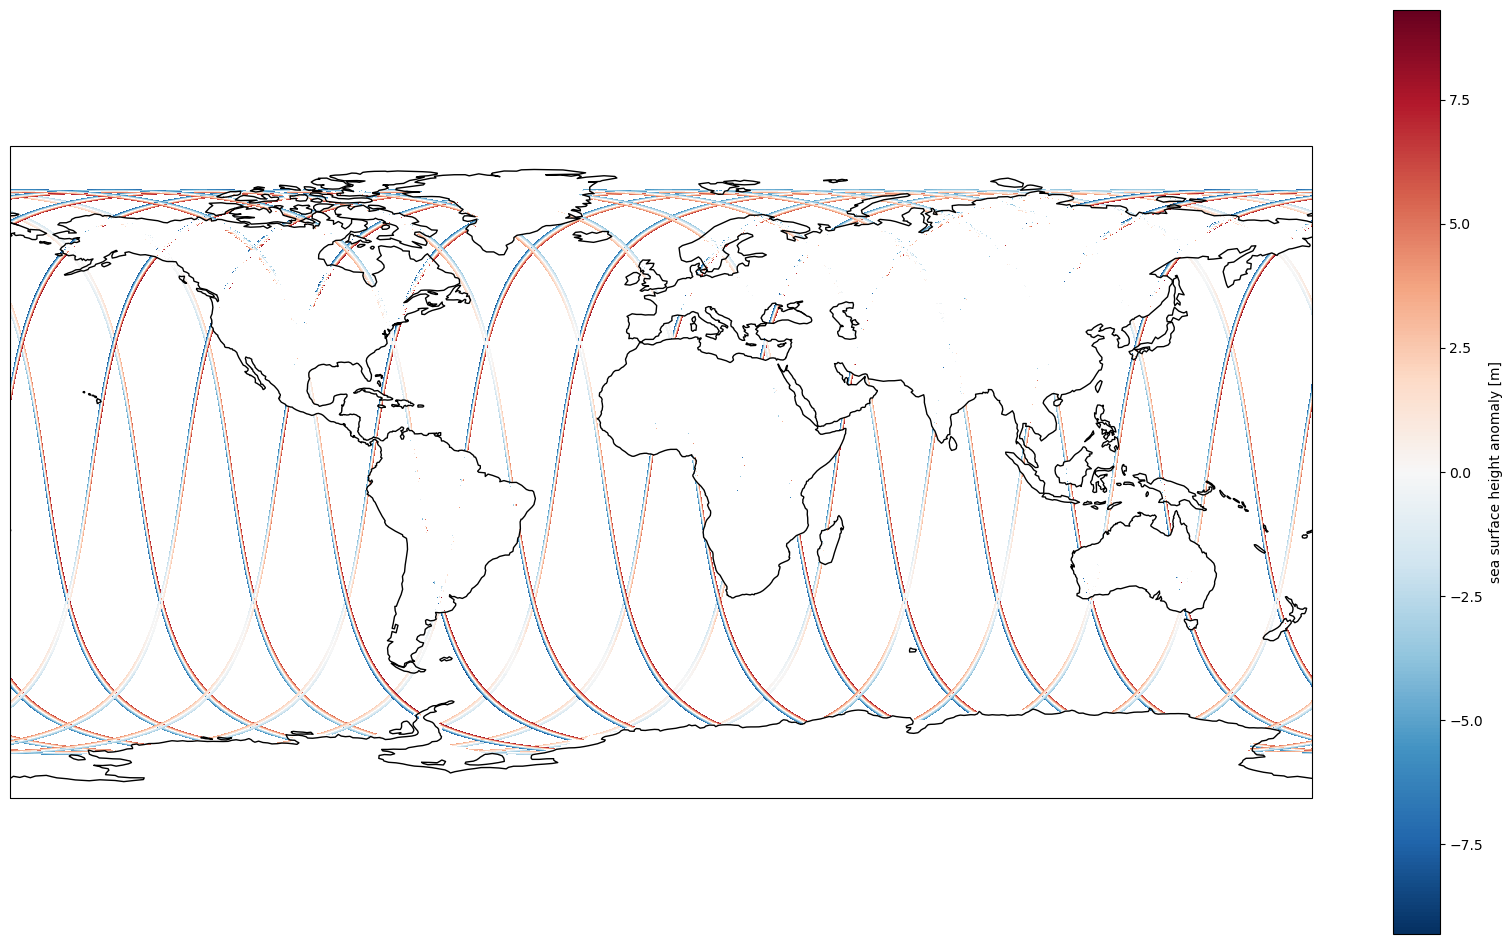

In [9]:
plt.figure(figsize=(21, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.ssha_karin.plot.pcolormesh(
 ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=True
)
ax.coastlines()

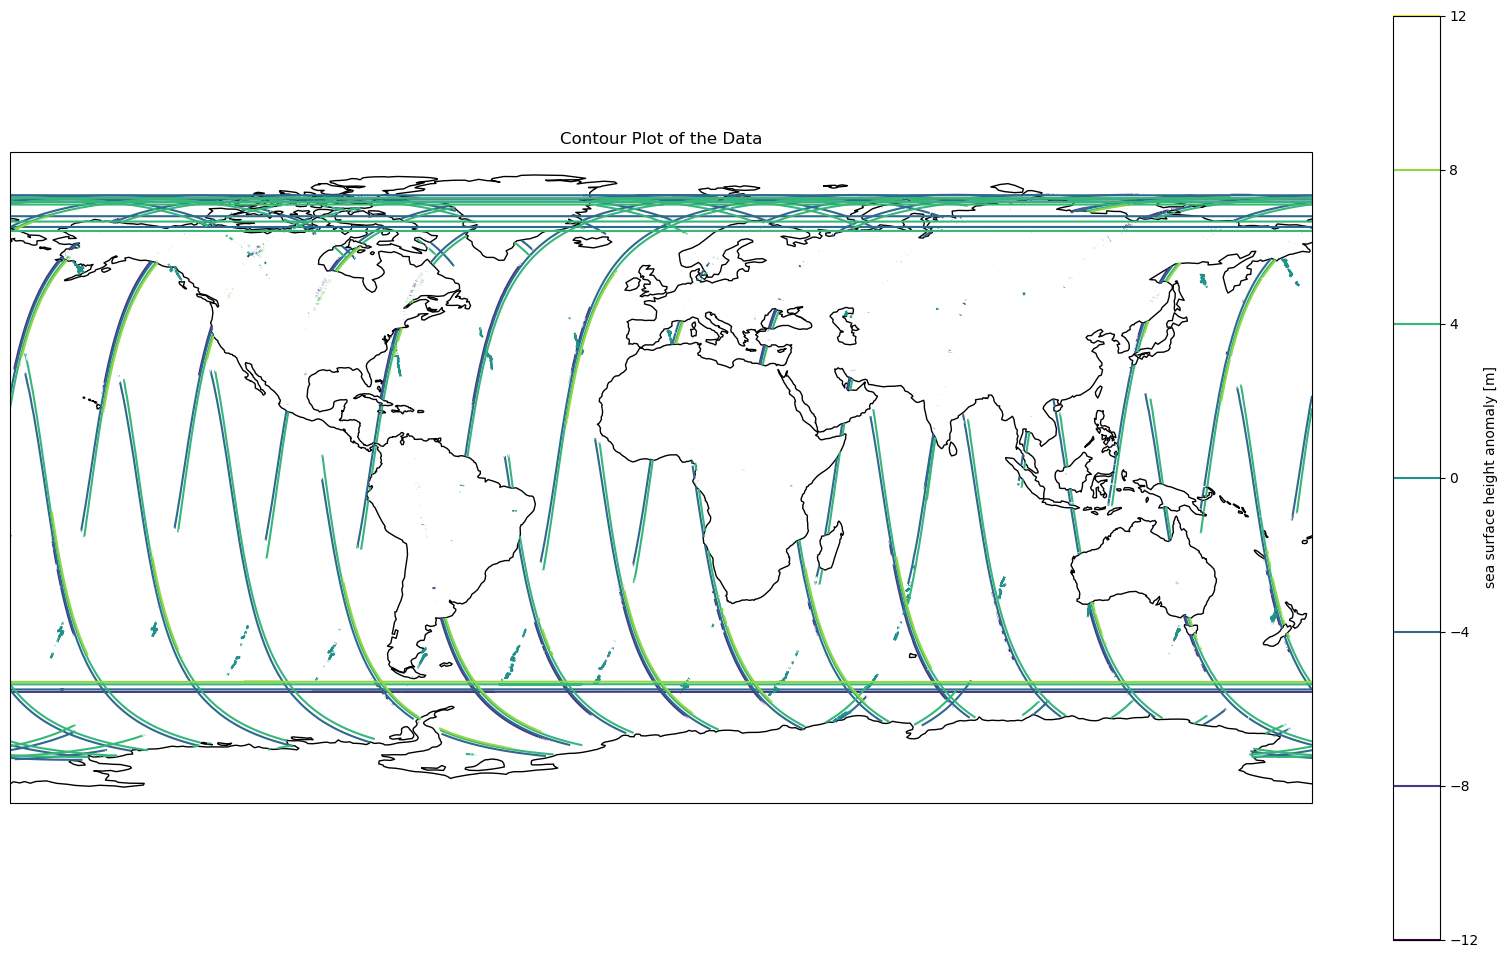

In [18]:
plt.figure(figsize=(21, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Create a contour plot
contour_plot = ds.ssha_karin.plot.contour(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    cmap="viridis",  # Colormap to use
    add_colorbar=True,
)

# Add coastlines
ax.coastlines()
plt.title("Contour Plot of the Data")

plt.show()

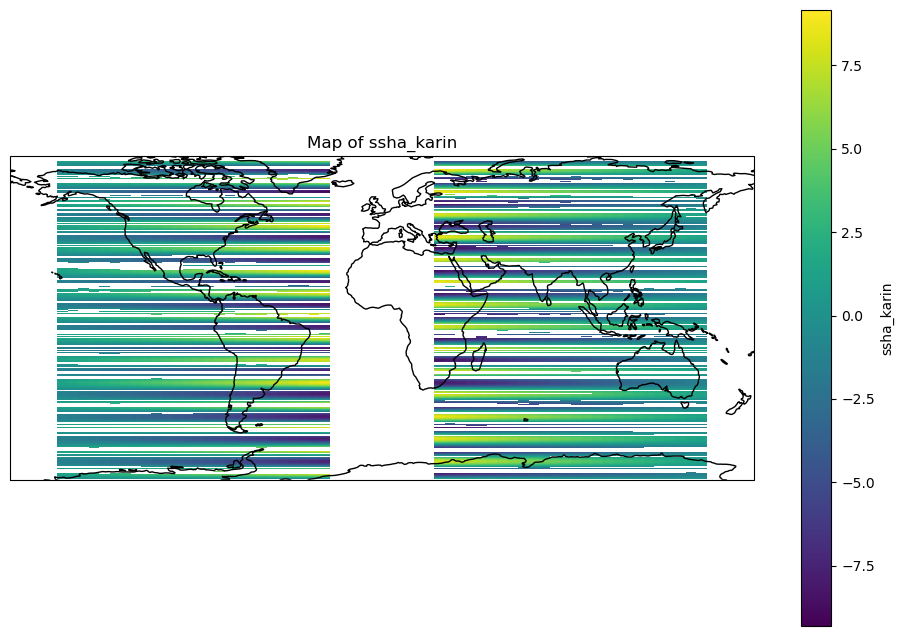

In [28]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Get the coordinates and data values
longitude = ds.longitude.values
latitude = ds.latitude.values
ssha_karin = ds.ssha_karin.values

# Calculate cell edges (assumes evenly spaced coordinates)
lon_edges = np.linspace(longitude.min(), longitude.max(), longitude.shape[1] + 1)
lat_edges = np.linspace(latitude.min(), latitude.max(), latitude.shape[0] + 1)

# Plot ssha_karin using pcolormesh with explicit cell edges
mappable = ax.pcolormesh(lon_edges, lat_edges, ssha_karin,
                         transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines
ax.coastlines()

# Create a colorbar using the mappable object
cbar = plt.colorbar(mappable, label='ssha_karin')

plt.title('Map of ssha_karin')
plt.show()
